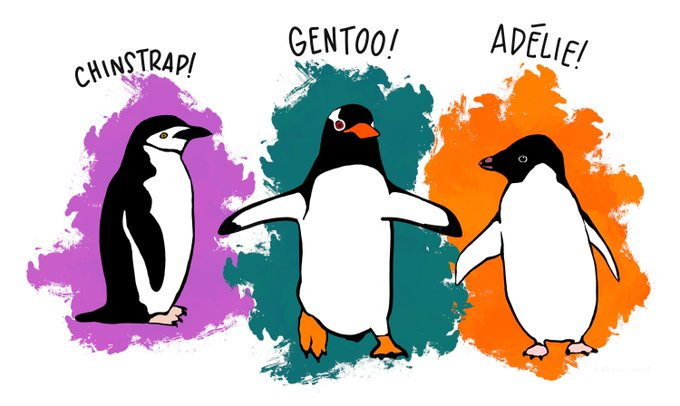

In [ ]:
import pandas as pd
# import numpy as np
# from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import classification_report
# import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("penguins_raw.csv")

In [ ]:
df.head()

,Unnamed: 0,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,1,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,2,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,3,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,4,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,5,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


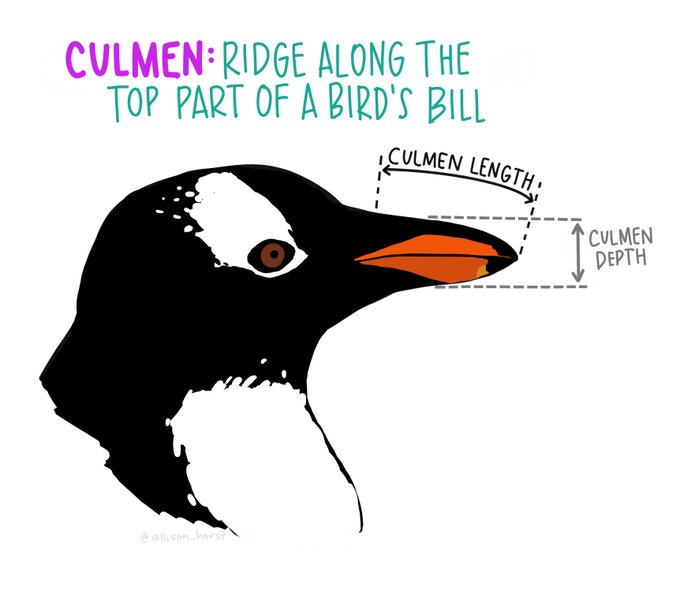

Antes de plotar vamos diminuir os nomes das classes pra melhorar a visualizacao no grafico

In [ ]:
mapeamento = {'Adelie Penguin (Pygoscelis adeliae)': 'Adelie', 'Gentoo penguin (Pygoscelis papua)': 'Gentoo', 'Chinstrap penguin (Pygoscelis antarctica)': 'Chinstrap'}

df['Species'] = df['Species'].replace(mapeamento)

Vamos montar um ScatterPlot para ver como estão distribuídas as especies dos pinguins de acordo com a Altura e Largura do Culmen

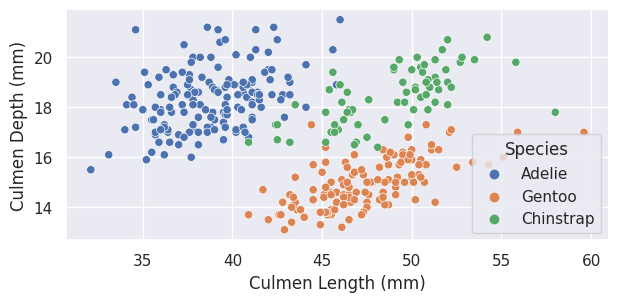

In [ ]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(7, 3)})
sns.scatterplot(data=df, x="Culmen Length (mm)", y="Culmen Depth (mm)", hue="Species");

Mas e se fizermos o ScatterPlot sem a coluna que representa as especies das amostras teremos uma dispersão como mostrado na figura a seguir:

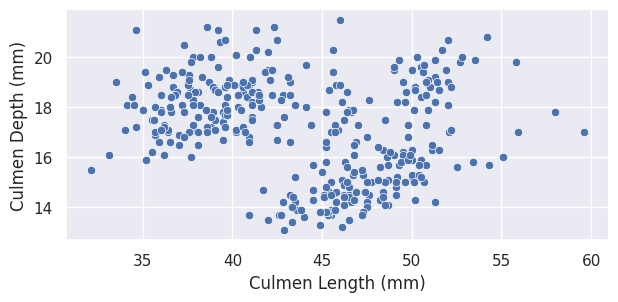

In [ ]:
sns.set(rc = {'figure.figsize':(7, 3)})
sns.scatterplot(data=df, x="Culmen Length (mm)", y="Culmen Depth (mm)");

Agora sem saber as classificação de cada amostra fica mais difícil saber o conjunto a qual pertence cada regiao do grafico. Sabemos que são tres grupos, porque vimos no gráfico anterior, mas este pode ser o caso em que você não sabe ao certo quantos grupos tem.

## Treinando o modelo de K-Means para agrupar as Especies

As colunas ['Unnamed: 0', 'studyName', 'Sample Number', 'Comments'] não possuem informações relevantes para este nosso estudo 

In [ ]:
df = df.drop(columns=['Unnamed: 0', 'studyName', 'Sample Number', 'Individual ID', 'Comments'])

Os dados categóricos vieram com a tipagem object que remete ser do tipo string.

In [ ]:
df.dtypes

Species                 object
Region                  object
Island                  object
Stage                   object
Clutch Completion       object
Date Egg                object
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
Sex                     object
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
dtype: object

In [ ]:
df['Species'].value_counts()   
#df['Island'].value_counts()  
#df['Clutch Completion'].value_counts()  
#df['Date Egg'].value_counts()  
#df.Region.value_counts()
#df.Stage.value_counts()

Adult, 1 Egg Stage    344
Name: Stage, dtype: int64

In [ ]:
df = df.drop(columns=['Region', 'Stage'])

Agora decidimos as colunas a serem utilizadas, podemos começar a lidar com o processo de transformação de dados categóricos em numéricos.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = df.columns
df[cols] = df[cols].apply(le.fit_transform)

In [ ]:
df.head()

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0,2,1,2,42,56,6,31,1,330,331
1,0,2,1,2,45,43,11,33,0,213,272
2,0,2,1,6,51,49,20,12,0,98,220
3,0,2,1,6,164,80,55,94,2,330,331
4,0,2,1,6,22,62,18,19,0,181,222


**K-MEANS**

In [ ]:
X = df[df.columns.difference(['Species'])].values

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
df['cluster'] = kmeans.labels_
df.head()

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),cluster
0,0,2,1,2,42,56,6,31,1,330,331,1
1,0,2,1,2,45,43,11,33,0,213,272,1
2,0,2,1,6,51,49,20,12,0,98,220,2
3,0,2,1,6,164,80,55,94,2,330,331,1
4,0,2,1,6,22,62,18,19,0,181,222,2


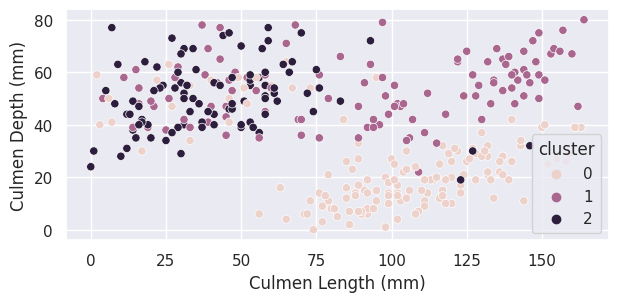

In [ ]:
sns.scatterplot(data=df, x="Culmen Length (mm)", y="Culmen Depth (mm)", hue="cluster");

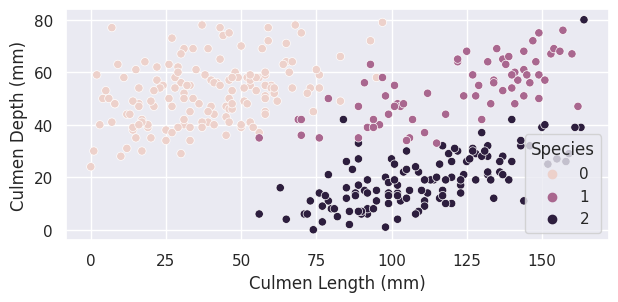

In [ ]:
sns.scatterplot(data=df, x="Culmen Length (mm)", y="Culmen Depth (mm)", hue="Species");

A assertividade do algoritmo K-means é geralmente medida por meio de métricas de avaliação de clusters, como o índice de Rand ajustado (ARI).

O ARI é uma métrica que compara os agrupamentos gerados pelo K-means com uma verdade de referência.Ele calcula a similaridade entre os agrupamentos obtidos e a verdade de referência, produzindo um valor entre -1 e 1

In [ ]:
from sklearn.metrics import adjusted_rand_score

y_true = df['Species']
y_pred = df['cluster']
# y_pred = kmeans.labels_

ari = adjusted_rand_score(y_true, y_pred)

print("ARI:", ari)


ARI: 0.5148669691464043


Um valor de ARI (Adjusted Rand Index) de 0.5 indica uma correspondência moderada entre os rótulos preditos e os rótulos verdadeiros. 